<a href="https://colab.research.google.com/github/mithun-martin/MACHINE-LEARNING/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import preprocessing

In [4]:

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [5]:
#no cloumn name gven they frgeto lol

In [6]:
pima = pd.read_csv("/content/pima-indians-diabetes.csv",header = None,names = col_names)


In [7]:
pima.head(8)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [8]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
feature = pima[['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']]
target = pima[["label"]]

feature_train,feature_test,target_train,target_test = train_test_split(feature,target)


In [10]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(feature_train,target_train)

#Predict the response for test dataset
y_pred = clf.predict(feature_test)

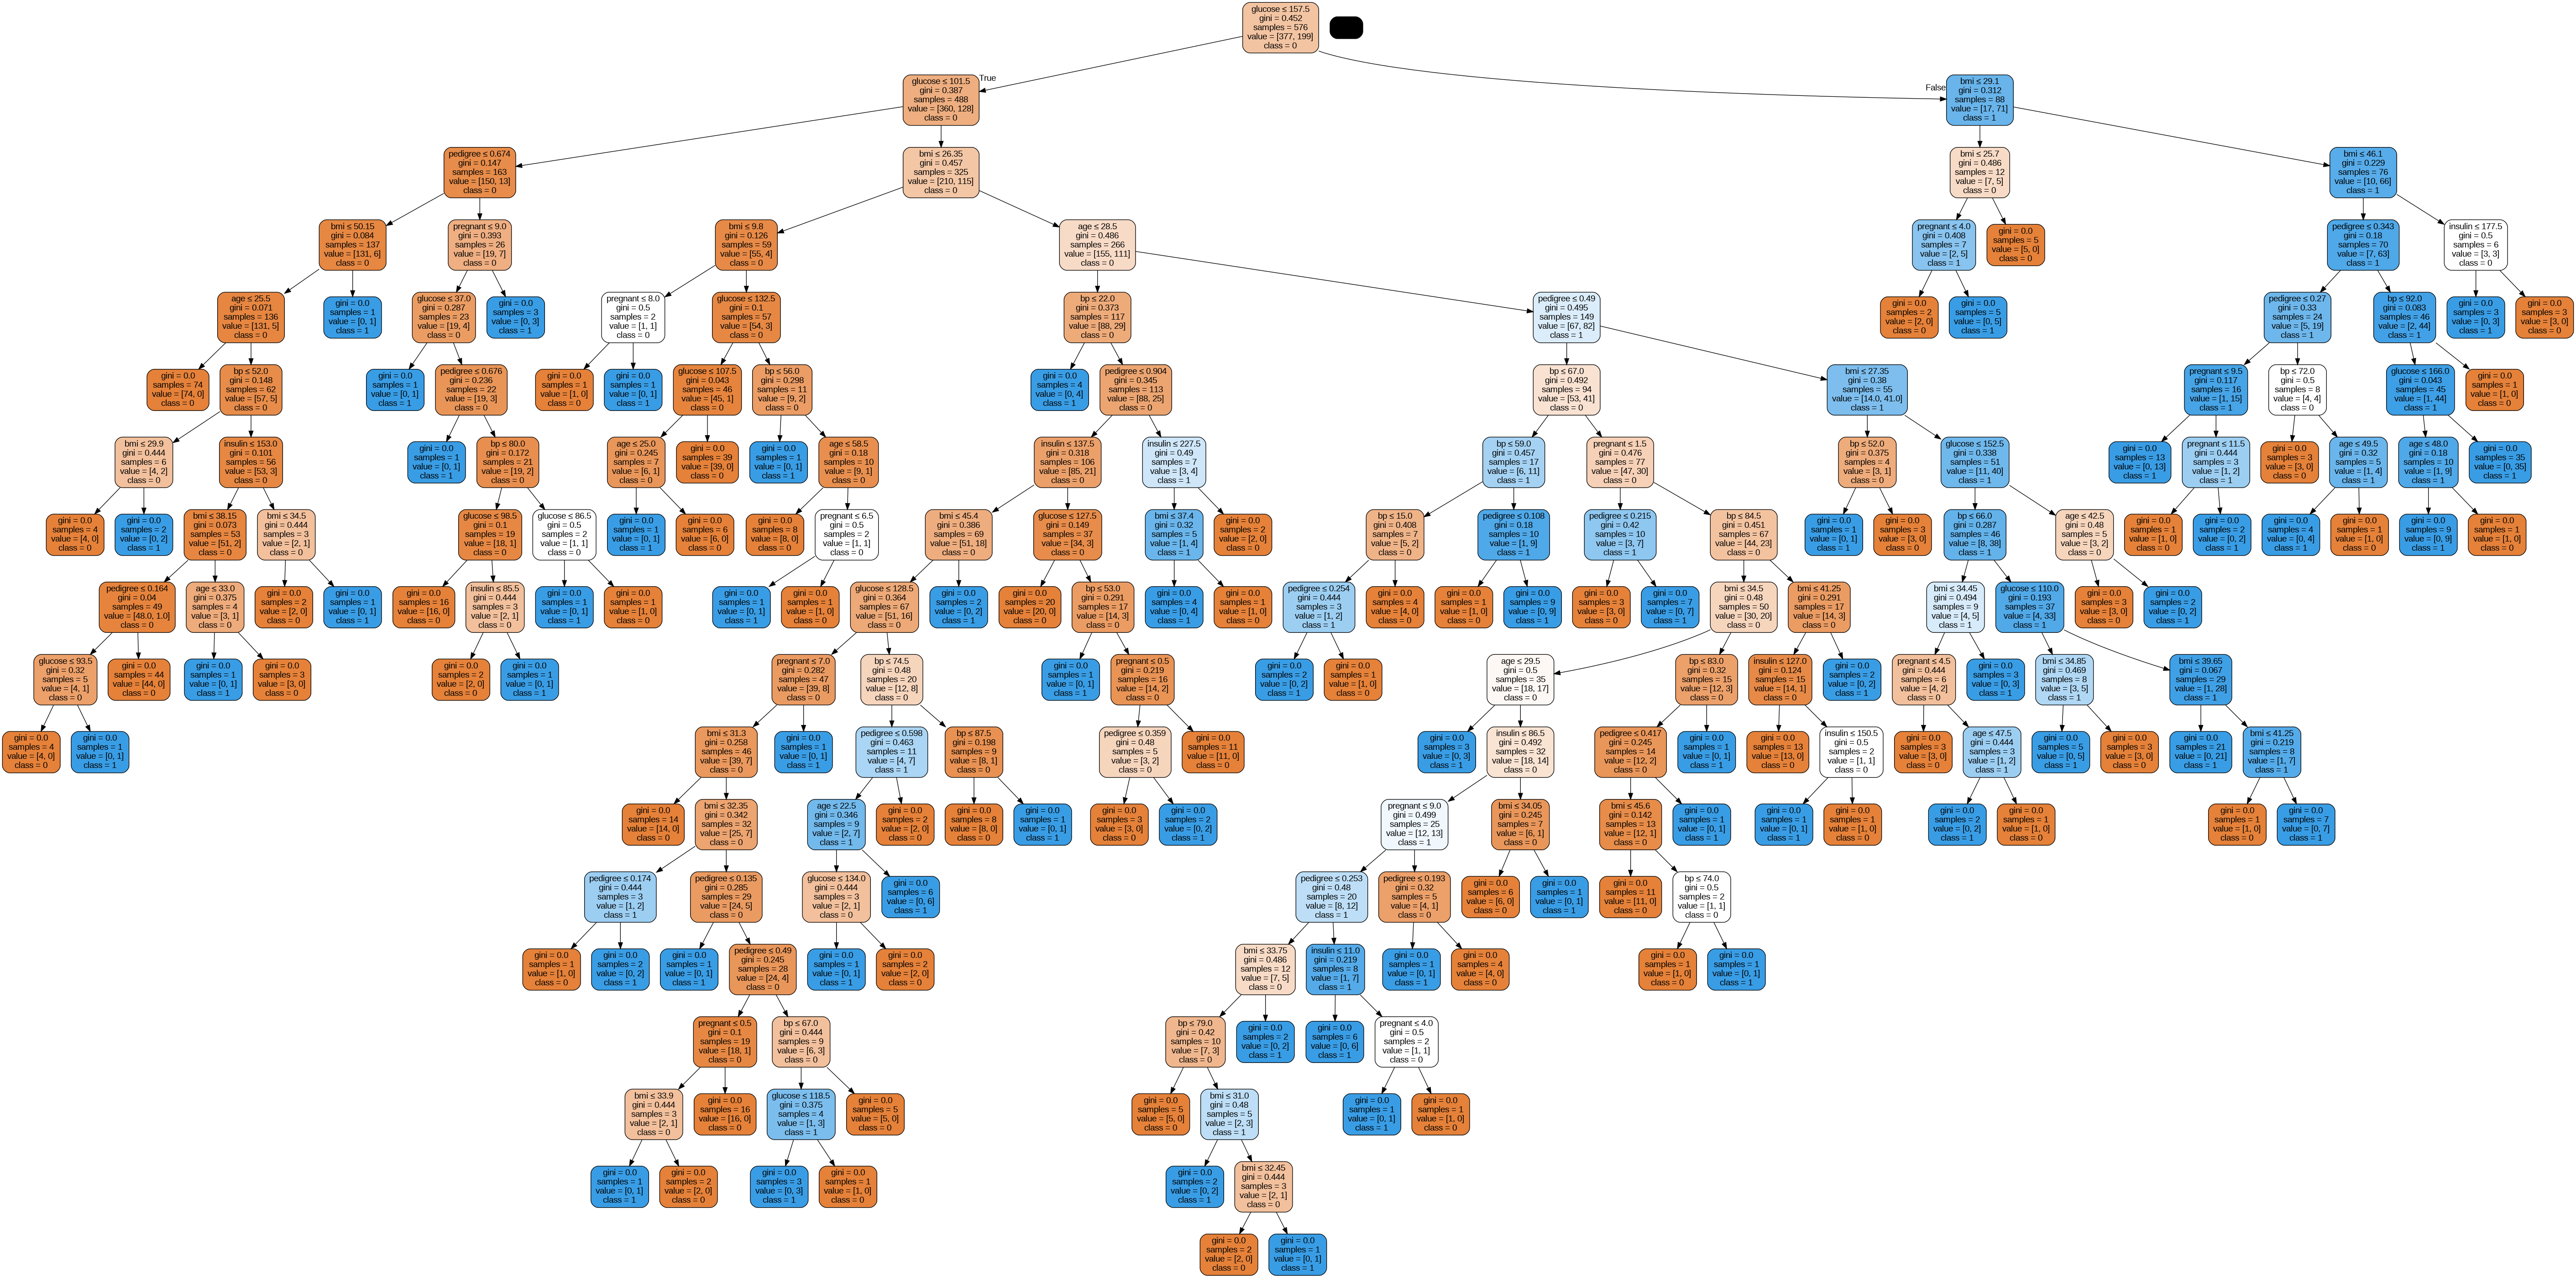

In [19]:
#Visualizing Decision Tree

# Importing the function to export decision tree structure to a dot format (graph description language)
from sklearn.tree import export_graphviz

# Importing StringIO to handle in-memory string buffer (temporary text stream to hold our dot data)
from io import StringIO

# To display images directly inside Jupyter / Colab notebooks
from IPython.display import Image

# To convert dot format graph description into a graph image file (PNG)
import pydotplus


dot_data = StringIO()
# Create an empty in-memory string buffer to hold the dot data

feature = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
# Defining the list of feature names you used to train your model


# Export the decision tree structure into dot format
# Parameters:
# clf : your trained decision tree model
# out_file : where to save dot data (in our case, in-memory buffer dot_data)
# filled : whether to color nodes by their classes (True = colored)
# rounded : rounded corners for boxes
# special_characters : allows symbols like ≤, ≥, etc.
# feature_names : list of feature names
# class_names : class labels (here '0' and '1' for diabetes/no-diabetes)

#📌 feature_names → what it means:
#👉 It’s a list of names of the features (columns) you trained your decision tree on.
#👉 These names will appear on the decision tree branches (the questions like “glucose ≤ 120.5?” etc.)


#📌 class_names → what it means:
#👉 It’s the possible target class labels (output values) your decision tree predicts.
#In your diabetes dataset — label is either 0 (No diabetes) or 1 (Has diabetes)
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature,
                class_names=['0','1'])

# Convert the dot data from string buffer into a graph object using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the graph object as a PNG image file named 'diabetes.png'
graph.write_png('diabetes.png')

# Display the image inline inside the notebook
Image(graph.create_png())


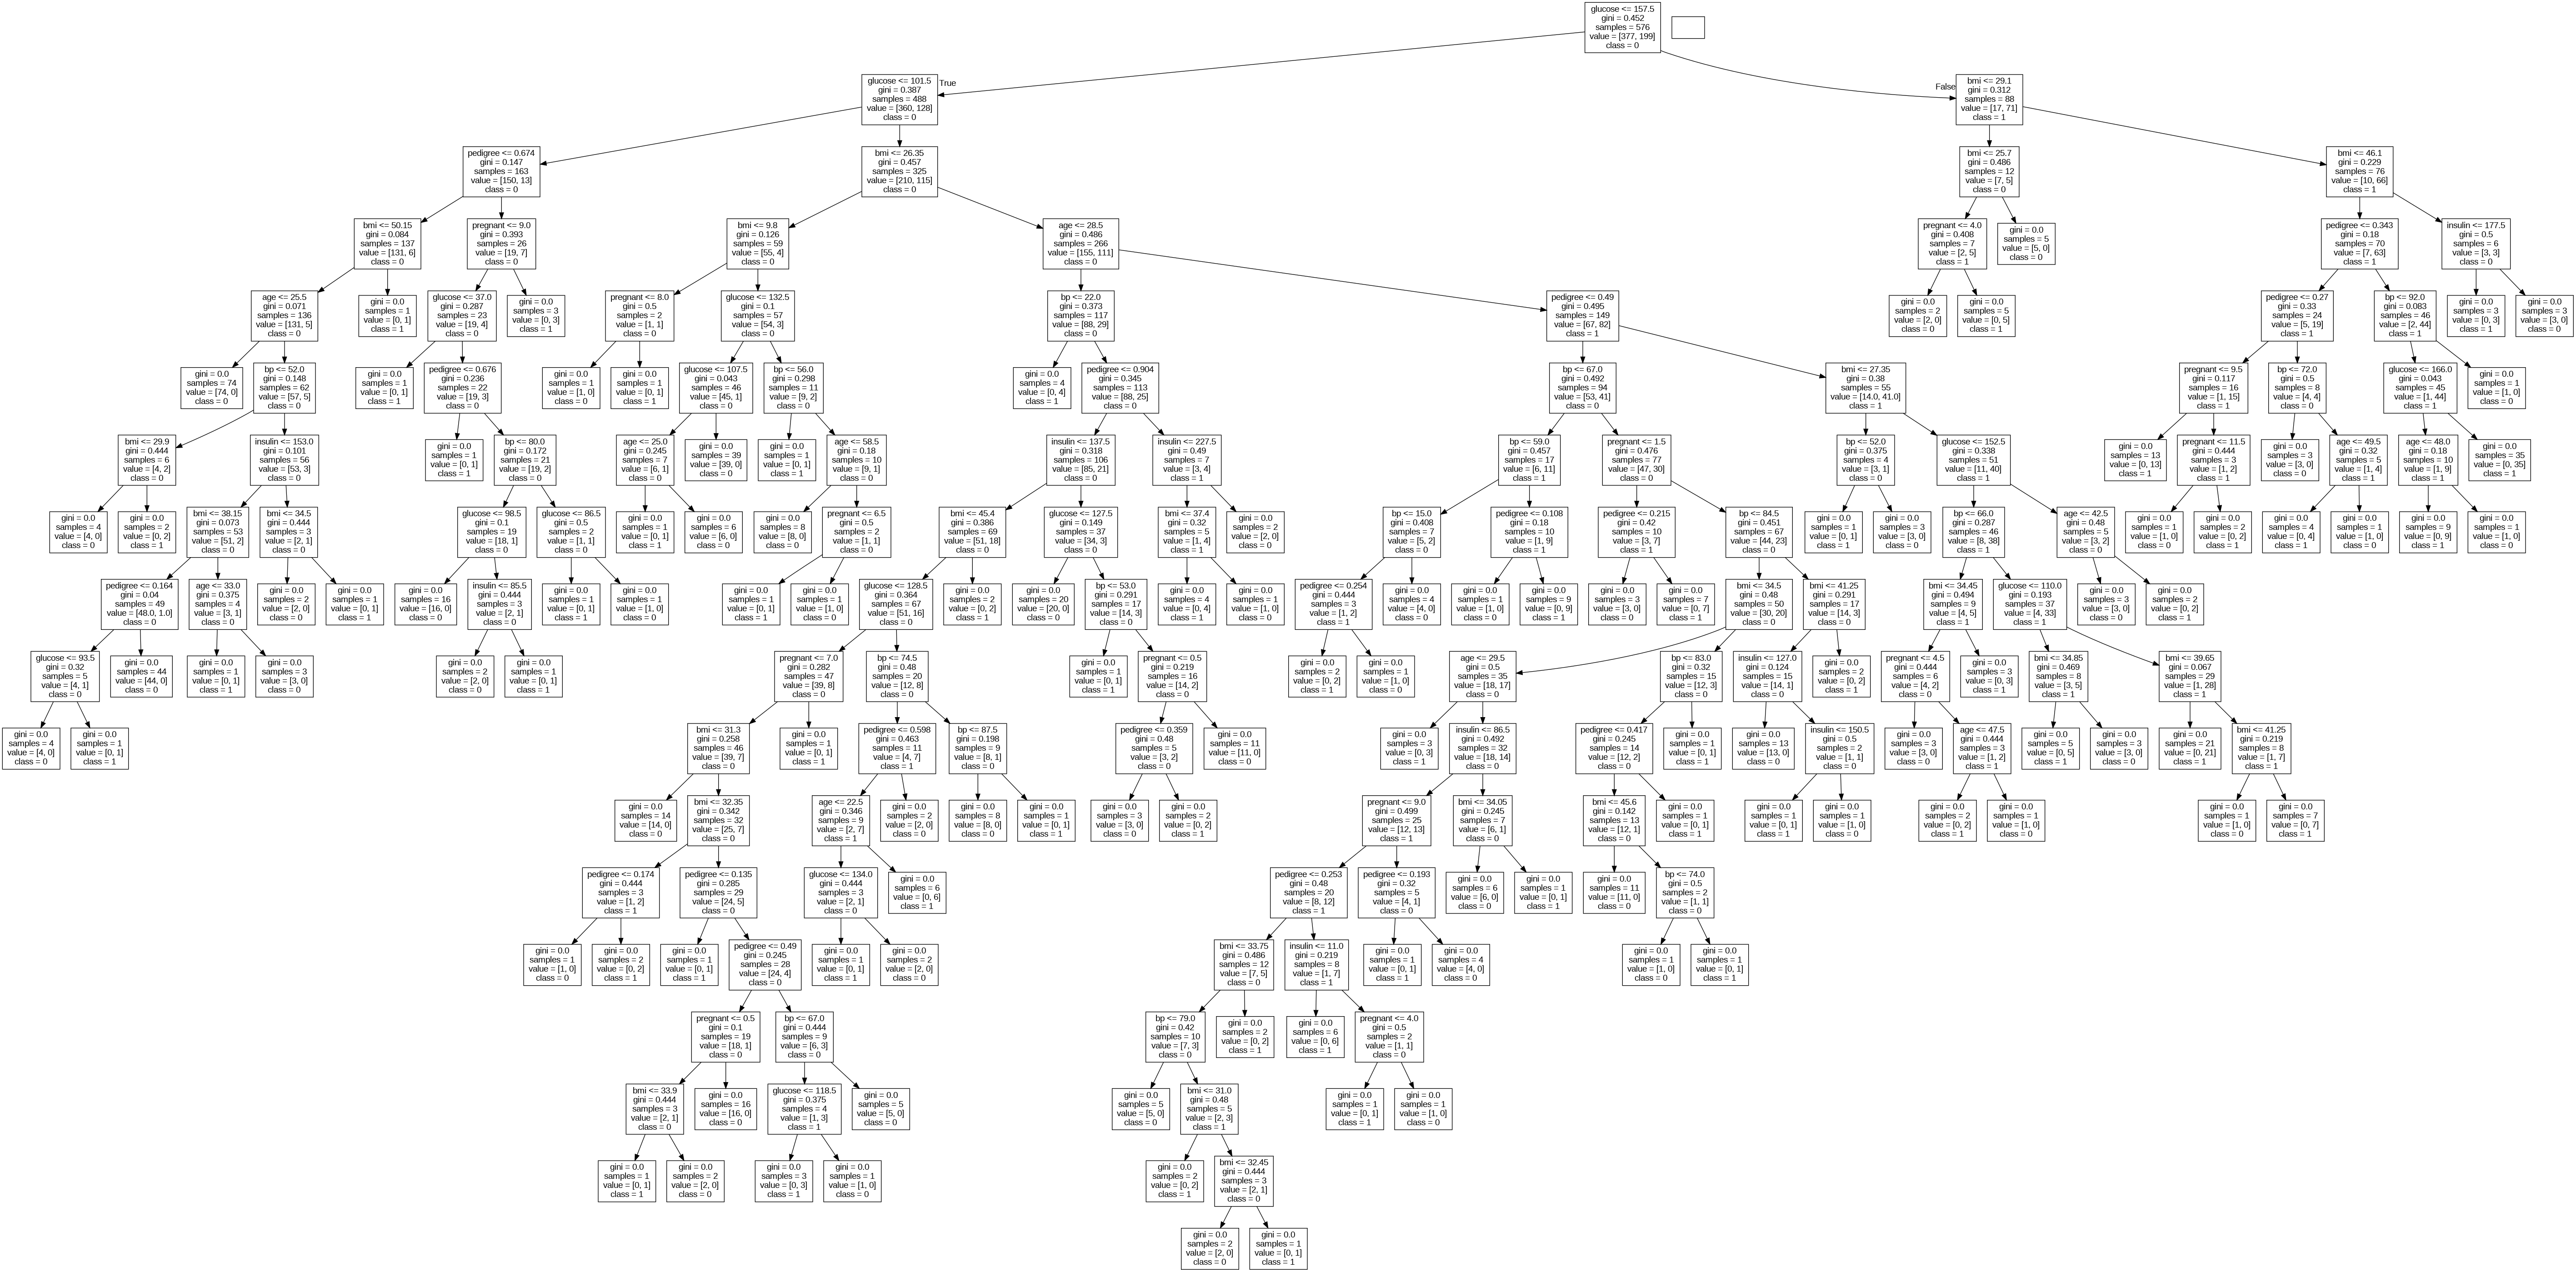

In [22]:
#export_graphviz() → converts tree into dot format
#StringIO() → temporary in-memory text holder to store the dot text format of tree
#pydotplus → converts dot text from string buuffer to graph image
#Image() → display in notebook

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
feature = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

export_graphviz(clf, out_file = dot_data, feature_names = feature, class_names=["0","1"])
#to export dt to dot fromat and store in a string buffer named dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#to create graph from dot data
Image(graph.create_png())
#to diplay graph image
